In [266]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats

In [267]:
output = "NBA_output.csv"
df = pd.read_csv(output)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000
4,281,Damian Jones,24.0,3,C,0.000000,1544951


# WE DID AN ANOVA ANALISIS TO CHECK IF THE FACTOR WAS STATISTICALLY SIGNIFICANT BETWEEN POSICIONS

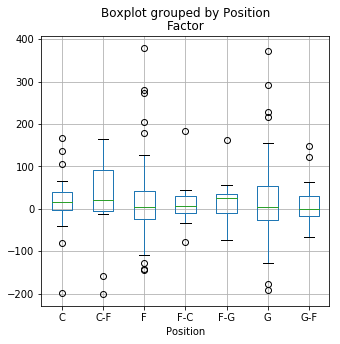

In [268]:
df.boxplot("Factor", by="Position", figsize=(5, 5))

In [269]:
# Extract individual groups
group1 = df[df["Position"] == "C"]["Factor"]
group2 = df[df["Position"] == "G-F"]["Factor"]
group3 = df[df["Position"] == "F"]["Factor"]
group4 = df[df["Position"] == "F-C"]["Factor"]
group5 = df[df["Position"] == "F-G"]["Factor"]
group6 = df[df["Position"] == "G"]["Factor"]
group7 = df[df["Position"] == "G-F"]["Factor"]

In [270]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=0.023773335533877414, pvalue=0.9999415220017865)

# NOT STATISTICALLY SIGNIFICANT FACTOR VS POSITION BECAUSE P VALUE TOO HIGH

In [271]:
#df["Position"].replace("G-F", "G", inplace=True)
#df["Position"].replace("F-C", "F", inplace=True)
#df["Position"].replace("C-F", "C", inplace=True)
#df["Position"].replace("F-G", "F", inplace=True)

In [272]:
#df["Position"].value_counts()

# BECAUSE SIMPLY BETWEEN POSITIONS IT WAS NOT STATISTICALLY SIGNIFICANT - WE CHECKED TO SEE IF THERE WAS ANOTHER FACTOR THAT WE HAD EXTRACTED THAT COULD DIFFIRENTIATE THE GROUPS. The first test that we did was to compare Age vs. Factor and Years Pro vs. Factor

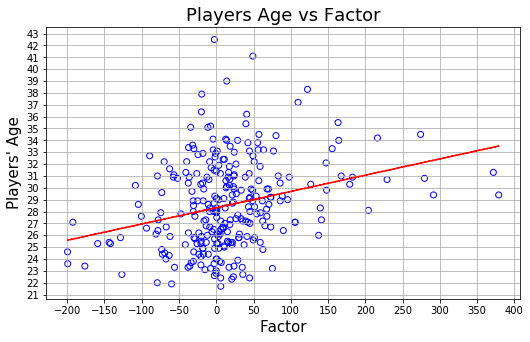

In [273]:
y = df["Age"]
x = df["Factor"]

y_axis = np.arange(21, 44)
x_axis = np.arange(-200, 450, 50)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Players Age vs Factor", fontsize='18')

fig = plt.gcf()
fig.set_size_inches(8.5, 5)
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.ylabel("Players' Age", fontsize = 15)
plt.xlabel("Factor", fontsize = 15)
plt.grid()
plt.show()

# There is a positive trend with the higher the player's age, the higher their factor


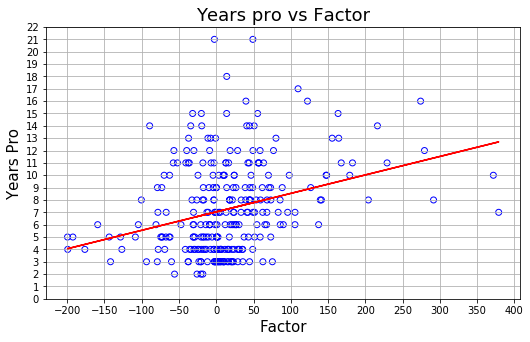

In [274]:
y = df["Years Pro"]
x = df["Factor"]

y_axis = np.arange(0, 23)
x_axis = np.arange(-200, 450, 50)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

fig3 = plt.gcf()
fig3.set_size_inches(8.5, 5)
plt.title("Years pro vs Factor", fontsize = '18')
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.ylabel("Years Pro", fontsize = 15)
plt.xlabel("Factor", fontsize = 15)
plt.grid()
plt.show()

# There is also a positive relationship between Years Pro and Factor - which one is more impactful ? We created a regression model using Factor as a dependant variable and Years Pro and Age as the indipendant variables in seeing which one had a more positive impact. 

In [275]:
# You have to create a constant variable in order to do the linear regression 
df['const'] = 1
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048,1
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640,1
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601,1
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000,1
4,281,Damian Jones,24.0,3,C,0.000000,1544951,1


In [276]:
# Creating the model to compare factor with years pro and age
regyearsage = sm.OLS(endog=df['Factor'], exog=df[['const', 'Years Pro', 'Age']], missing='drop')
type(regyearsage)

statsmodels.regression.linear_model.OLS

In [277]:
resultsyearsage = regyearsage.fit()
type(resultsyearsage)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [278]:
print(resultsyearsage.summary())

                            OLS Regression Results                            
Dep. Variable:                 Factor   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.52
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.01e-06
Time:                        13:48:30   Log-Likelihood:                -1584.9
No. Observations:                 278   AIC:                             3176.
Df Residuals:                     275   BIC:                             3187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.6816     57.901     -0.789      0.4

# You can see in this readout that when comparing how to explain Factor with Years Pro and Age, Years Pro has a higher T-Score than Age and the p-value of Years Pro is bellow .05 - marking it's significance. This could be explained by a multiple of factors, including such statements as "A player that doesn't have a high factor, does not stay in the league as long. Therfore the longer the player has been in the NBA, the more likely reason he is still playing is because teams still want him due to his positive factor. This is why in the NBA last season, the players that have been in the NBA for many years tend to have a higher factor." 

# The following thing we checked was how an NBA players salary was affected by his Factor. So we made the Factor de indipendant variable and the Salary the dependant variable. In other words, do you get paid more the better you are? 

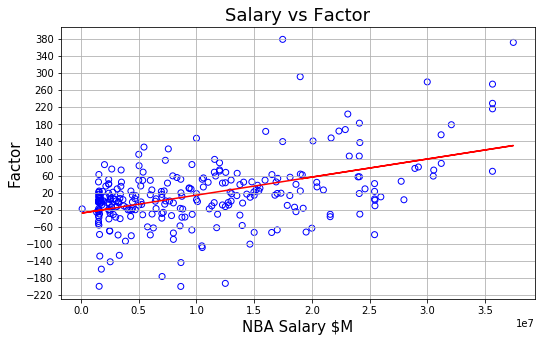

In [279]:
y = df["Factor"]
x = df["NBA Salary"]

y_axis = np.arange(-220, 420, 40)
x_axis = np.arange(0, 40000000, 5000000)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

fig5 = plt.gcf()
fig5.set_size_inches(8.5, 5)
plt.title("Salary vs Factor", fontsize = '18')
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.ylabel("Factor", fontsize = 15)
plt.xlabel("NBA Salary $M", fontsize = 15)
plt.grid()
plt.show()

# We saw a positive relationship, and then asked ourselves, "Does it vary by position played?"

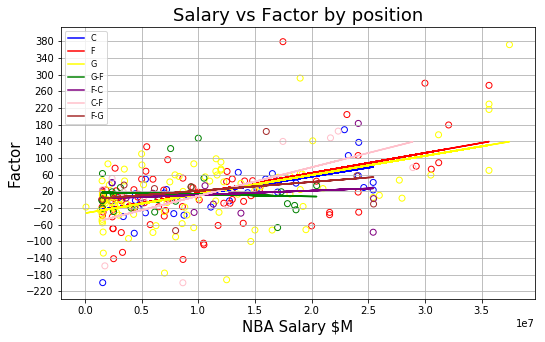

In [280]:
c = df.loc[df["Position"] == "C"]
f = df.loc[df["Position"] == "F"]
g = df.loc[df["Position"] == "G"]
gf = df.loc[df["Position"] == "G-F"]
fc = df.loc[df["Position"] == "F-C"]
cf = df.loc[df["Position"] == "C-F"]
fg = df.loc[df["Position"] == "F-G"]

y_axis = np.arange(-220, 420, 40)
x_axis = np.arange(0, 40000000, 5000000)

y1 = c["Factor"]
x1 = c["NBA Salary"] 
y2 = f["Factor"]
x2 = f["NBA Salary"]
y3 = g["Factor"]
x3 = g["NBA Salary"]
y4 = gf["Factor"]
x4 = gf["NBA Salary"]
y5 = fc["Factor"]
x5 = fc["NBA Salary"]
y6 = cf["Factor"]
x6 = cf["NBA Salary"]
y7 = fg["Factor"]
x7 = fg["NBA Salary"]

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig6 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig6.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

ax3 = fig6.add_subplot(111)
ax3.scatter(x3, y3, facecolors = "none", edgecolors = "yellow")
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"-", color = "yellow")

ax4 = fig6.add_subplot(111)
ax4.scatter(x4, y4, facecolors = "none", edgecolors = "green")
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"g-") 

ax5 = fig6.add_subplot(111)
ax5.scatter(x5, y5, facecolors = "none", edgecolors = "purple")
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"-", color = "purple") 

ax6 = fig6.add_subplot(111)
ax6.scatter(x6, y6, facecolors = "none", edgecolors = "pink")
z6 = np.polyfit(x6, y6, 1)
p6 = np.poly1d(z6)
plt.plot(x6,p6(x6),"-", color = "pink") 

ax7 = fig6.add_subplot(111)
ax7.scatter(x7, y7, facecolors = "none", edgecolors = "brown")
z7 = np.polyfit(x7, y7, 1)
p7 = np.poly1d(z7)
plt.plot(x7,p7(x7),"-", color = "brown") 

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.ylabel("Factor", fontsize = 15)
plt.xlabel("NBA Salary $M", fontsize = 15)

plt.title("Salary vs Factor by position", fontsize='18')
fig6.set_size_inches(8.5, 5)
positions = ["C", "F", "G", "G-F", "F-C", "C-F", "F-G"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.show()

# After seeing the graph above, the yellow, red, and blue line seem to be very close to each other and follow a similar slope. There seems to be a difference of Money Made vs. Factor with players that play a single position vs. players that play multiple positions. We decided to group the players that play single positions and multiple positions and to see if  the factor impacted their salary more if they were a player that played multiple positions or single positions. In other words, are single position players paid higher for their productivity vs. players that play multiple positions

In [281]:
df["Position"].replace("G-F", "Multiple Position Player", inplace=True)
df["Position"].replace("F-C", "Multiple Position Player", inplace=True)
df["Position"].replace("C-F", "Multiple Position Player", inplace=True)
df["Position"].replace("F-G", "Multiple Position Player", inplace=True)
df["Position"].replace("C", "Single Position Player", inplace=True)
df["Position"].replace("F", "Single Position Player", inplace=True)
df["Position"].replace("G", "Single Position Player", inplace=True)

In [282]:
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
0,17,Justin Anderson,25.7,4,Multiple Position Player,-28.632562,2516048,1
1,49,DeAndre' Bembry,25.0,3,Multiple Position Player,10.801852,1634640,1
2,94,Vince Carter,42.5,21,Multiple Position Player,-2.526068,1512601,1
3,119,Allen Crabbe,27.3,6,Multiple Position Player,-14.052688,18500000,1
4,281,Damian Jones,24.0,3,Single Position Player,0.000000,1544951,1


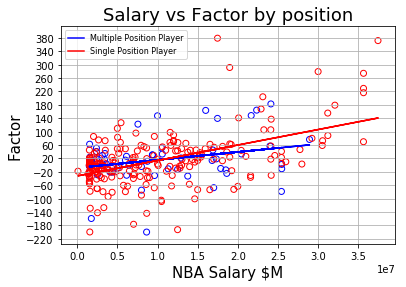

In [283]:
multiple = df.loc[df["Position"] == "Multiple Position Player"]
single = df.loc[df["Position"] == "Single Position Player"]
warnings.filterwarnings('ignore')

y1 = multiple["Factor"]
x1 = multiple["NBA Salary"] 
y2 = single["Factor"]
x2 = single["NBA Salary"]

y_axis = np.arange(-220, 420, 40)
x_axis = np.arange(0, 40000000, 5000000)

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig2 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig2.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.ylabel("Factor", fontsize = 15)
plt.xlabel("NBA Salary $M", fontsize = 15)

plt.title("Salary vs Factor by position", fontsize='18')
fig6.set_size_inches(20, 20)
positions = ["Multiple Position Player", "Single Position Player"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.show()

# There seems to be a higher positive relationship between factor and NBA Salary - we decided to create two dataframes - one with each type of position-group (single + multiple position categories) and use a linear regression to see in which group the factor impacts NBA Salary more

# First we begin with splitting Multiple Position Player into a seperate DF and creating the model to compare how the Factor impacts NBA Salary

In [284]:
# Create a new DataFrame that looks into multiple positions only
m_df = df.loc[df["Position"] == "Multiple Position Player"]
m_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
0,17,Justin Anderson,25.7,4,Multiple Position Player,-28.632562,2516048,1
1,49,DeAndre' Bembry,25.0,3,Multiple Position Player,10.801852,1634640,1
2,94,Vince Carter,42.5,21,Multiple Position Player,-2.526068,1512601,1
3,119,Allen Crabbe,27.3,6,Multiple Position Player,-14.052688,18500000,1
8,521,Evan Turner,30.7,9,Multiple Position Player,-9.784861,17868853,1


In [285]:
regm = sm.OLS(endog=m_df['NBA Salary'], exog=m_df[['const', 'Factor']], missing='drop')
type(regm)

statsmodels.regression.linear_model.OLS

In [286]:
resultsm = regm.fit()
type(resultsm)

statsmodels.regression.linear_model.RegressionResultsWrapper

# Then we split single position player into a seperate DF and creating the model to compare how the Factor impacts NBA Salary

In [287]:
# Create a new DataFrame that looks into multiple positions only
s_df = df.loc[df["Position"] == "Single Position Player"]
s_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
4,281,Damian Jones,24.0,3,Single Position Player,0.000000,1544951,1
5,313,Alex Len,26.1,6,Single Position Player,-80.858709,4350000,1
6,410,Jabari Parker,24.3,5,Single Position Player,-63.168730,20000000,1
7,412,Chandler Parsons,30.7,8,Single Position Player,17.995833,24107258,1
9,600,Alex Poythress,25.9,3,Single Position Player,2.886667,1544951,1


In [288]:
regs = sm.OLS(endog=s_df['NBA Salary'], exog=s_df[['const', 'Factor']], missing='drop')
type(regs)

statsmodels.regression.linear_model.OLS

In [289]:
resultss = regs.fit()
type(resultss)

statsmodels.regression.linear_model.RegressionResultsWrapper

# Print the readout for MULTIPLE POSITIONS for how factor affects salary

In [290]:
print(resultsm.summary())

                            OLS Regression Results                            
Dep. Variable:             NBA Salary   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.559
Date:                Sat, 20 Jul 2019   Prob (F-statistic):             0.0371
Time:                        13:48:37   Log-Likelihood:                -1001.1
No. Observations:                  58   AIC:                             2006.
Df Residuals:                      56   BIC:                             2010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.932e+06   1.04e+06      9.519      0.0

# Print the readout for Single Position players and how the factor affects their salary and then compare

In [291]:
print(resultss.summary())

                            OLS Regression Results                            
Dep. Variable:             NBA Salary   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     82.13
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           7.46e-17
Time:                        13:48:37   Log-Likelihood:                -3796.0
No. Observations:                 220   AIC:                             7596.
Df Residuals:                     218   BIC:                             7603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.313e+06    5.2e+05     17.915      0.0

# Comparing the two readouts - we can see that the Factor has a higher effect on NBA Salary with single position players than multiple position players. NBA salary has a higher  t score (9.063 in single) vs. (2.135 in multiple), a lower p-value (.000 in single) vs. (.037 in multiple), and a higher R-Squared (.274 in single) v.s. (.075 in multiple) when comparing the readouts. This means that if you are a player with a high factor that specializes in a single position, then you are more likely to make more money based on that factor. 